In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
3381  ham  Well, I meant as opposed to my drunken night o...        NaN   
1802  ham                      Ok lor thanx... ÌÏ in school?        NaN   
2278  ham  Hmm...Bad news...Hype park plaza $700 studio t...        NaN   
3600  ham                       Jay told me already, will do        NaN   
4597  ham  I'm stuck in da middle of da row on da right h...        NaN   

     Unnamed: 3 Unnamed: 4  
3381        NaN        NaN  
1802        NaN        NaN  
2278        NaN        NaN  
3600        NaN        NaN  
4597        NaN        NaN

In [4]:
df.shape

(5572, 5)

In [5]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
##1 Data Cleaning
##2 EDA
##3 Text Preprocessing
##4 Model Building
##5 Evaluation
##6 Improvment
##7 Website
##8 Deploy


## 1 Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

In [9]:
df.sample(4)

v1                                                 v2
1978  ham  No I'm in the same boat. Still here at my moms...
2609  ham             Awesome, text me when you're restocked
4202  ham  C movie is juz last minute decision mah. Juz w...
3909  ham  She.s good. She was wondering if you wont say ...

In [10]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)

In [11]:
df.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(6)

target                                               text
2407       0  Solve d Case : A Man Was Found Murdered On  &l...
3889       1  Double Mins & 1000 txts on Orange tariffs. Lat...
430        0                           At home watching tv lor.
5417       0           Nope. I just forgot. Will show next week
5473       0                Ok lor Ì_ reaching then message me.
1768       0  How. Its a little difficult but its a simple w...

In [15]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(403)

In [18]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2 EDA

In [22]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

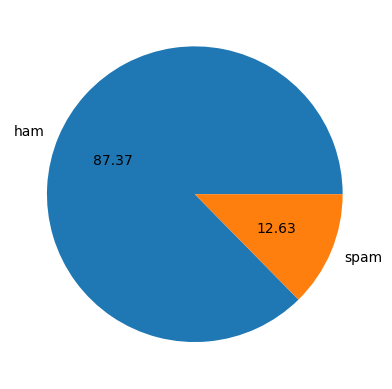

In [24]:
plt.pie(df['target'].value_counts() , labels = ['ham' ,'spam'] , autopct='%0.2f')
plt.show()

In [25]:
import nltk

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhijeet
[nltk_data]     Shekhawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [29]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [31]:
df['num_sentence'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [32]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentence  
0         24             2  
1          8             2  
2         37             2  
3         13             1  
4         15             1

In [33]:
df[['num_characters' , 'num_words' ,'num_sentence']].describe()

num_characters    num_words  num_sentence
count     5169.000000  5169.000000   5169.000000
mean        78.977945    18.455794      1.965564
std         58.236293    13.324758      1.448541
min          2.000000     1.000000      1.000000
25%         36.000000     9.000000      1.000000
50%         60.000000    15.000000      1.000000
75%        117.000000    26.000000      2.000000
max        910.000000   220.000000     38.000000

In [34]:
## ham massage
df[df['target'] == 0][['num_characters' , 'num_words' ,'num_sentence']].describe()

num_characters    num_words  num_sentence
count     4516.000000  4516.000000   4516.000000
mean        70.459256    17.123782      1.820195
std         56.358207    13.493970      1.383657
min          2.000000     1.000000      1.000000
25%         34.000000     8.000000      1.000000
50%         52.000000    13.000000      1.000000
75%         90.000000    22.000000      2.000000
max        910.000000   220.000000     38.000000

In [35]:
## spam message
df[df['target'] == 1][['num_characters' , 'num_words' ,'num_sentence']].describe()

num_characters   num_words  num_sentence
count      653.000000  653.000000    653.000000
mean       137.891271   27.667688      2.970904
std         30.137753    7.008418      1.488425
min         13.000000    2.000000      1.000000
25%        132.000000   25.000000      2.000000
50%        149.000000   29.000000      3.000000
75%        157.000000   32.000000      4.000000
max        224.000000   46.000000      9.000000

In [36]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

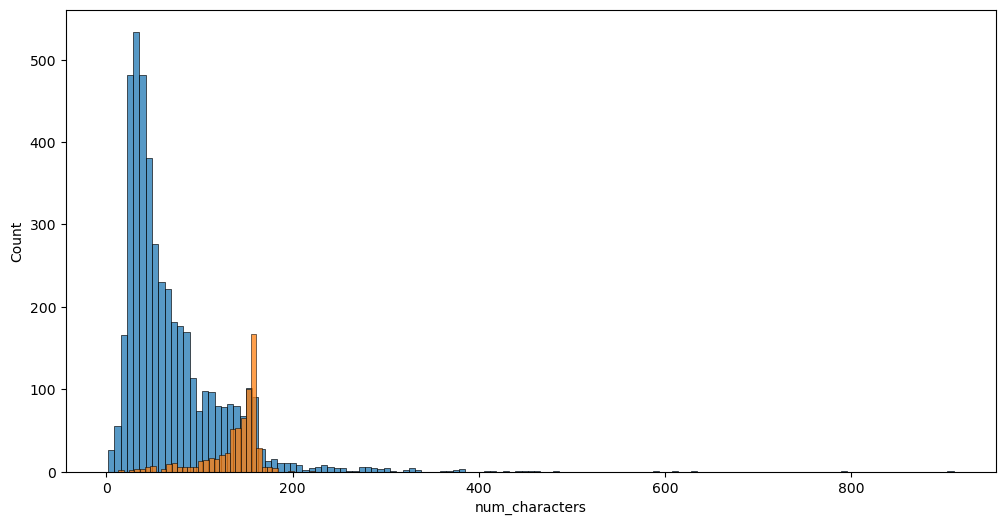

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

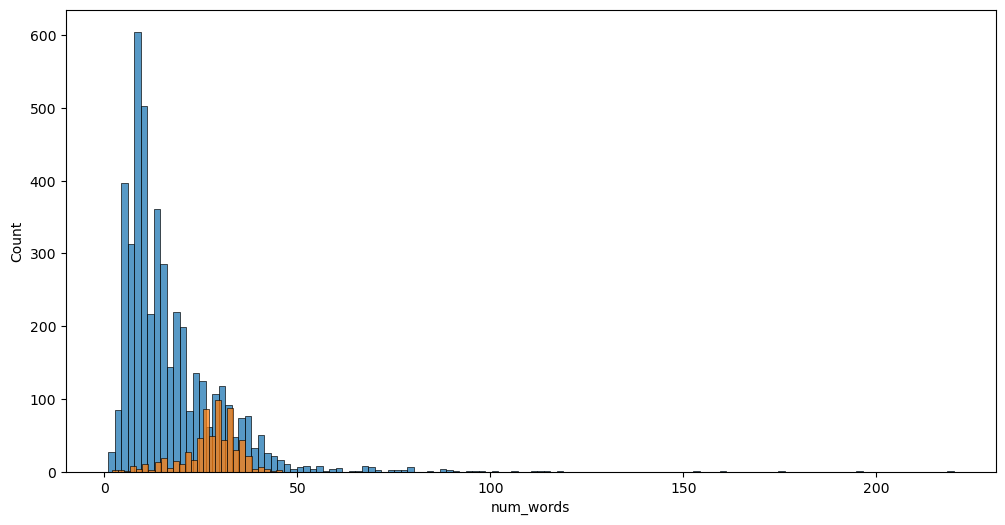

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

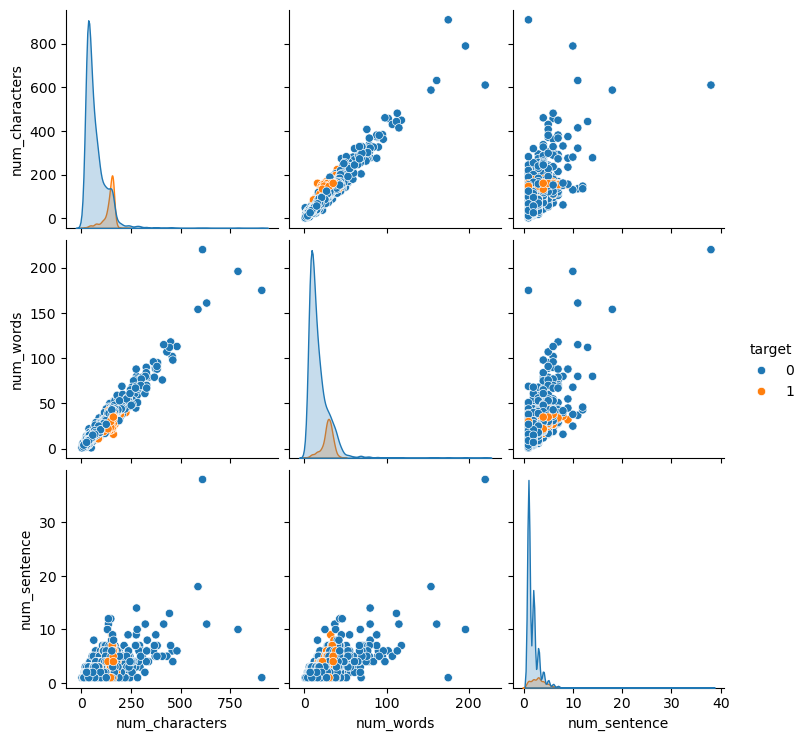

In [39]:
sns.pairplot(df , hue='target')

In [40]:
Data = df.select_dtypes(include='number').corr()

In [41]:
Data

target  num_characters  num_words  num_sentence
target          1.000000        0.384717   0.262912      0.263939
num_characters  0.384717        1.000000   0.965760      0.624139
num_words       0.262912        0.965760   1.000000      0.679971
num_sentence    0.263939        0.624139   0.679971      1.000000

<Axes: >

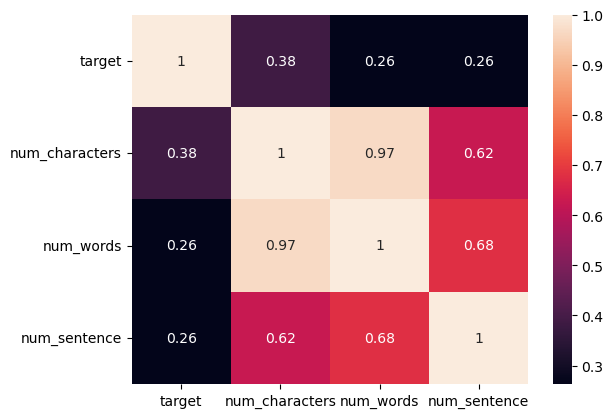

In [42]:
sns.heatmap(Data,annot=True)

In [43]:
df

target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentence  
0                111         24             2  
1                 29          8             2  
2                155         37             2  
3                 49         13             1  
4                 61         15             1  
...              ...        ...           ...  
5567             161         35             4  
5568              37          9             1  
5569              57         15             2  
5570             125         27             1  
5571              26          7             2  

[5169 rows x 5 columns]

In [44]:
df.tail()

target                                               text  \
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentence  
5567             161         35             4  
5568              37          9             1  
5569              57         15             2  
5570             125         27             1  
5571              26          7             2

## 3 Data Preprocessing

## . Lower Case
## . Tokenization
## . Removing Special Character
## . Removing Stop Words And Punctation
## . Stemming

In [45]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        


            
            
    return " ".join(y)

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhijeet
[nltk_data]     Shekhawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
transfrom_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [53]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [55]:
df['transformed_text'] = df['text'].apply(transfrom_text)

In [56]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentence                                   transformed_text  
0         24             2  go jurong point crazi avail bugi n great world...  
1          8             2                              ok lar joke wif u oni  
2         37             2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13             1                u dun say earli hor u c alreadi say  
4         15             1               nah think goe usf live around though

In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

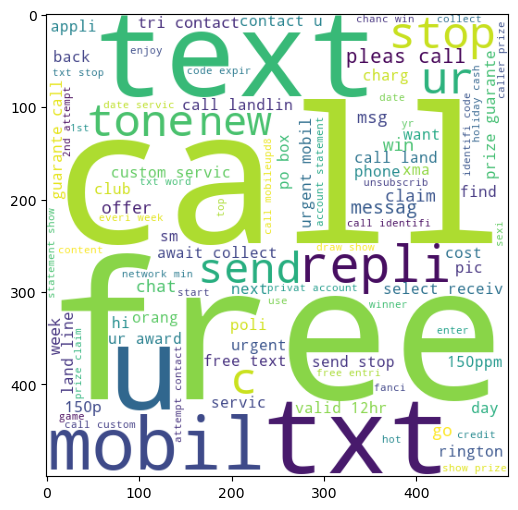

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

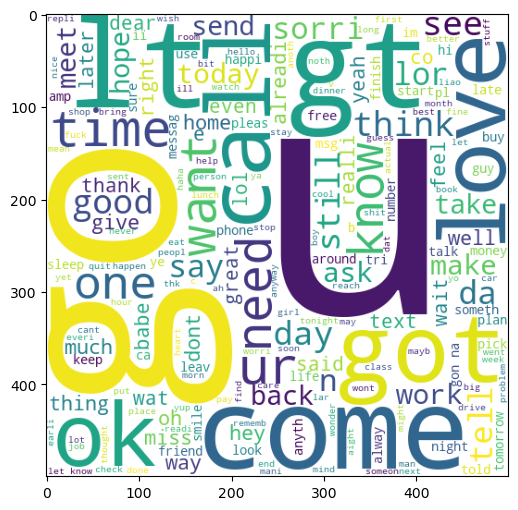

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentence                                   transformed_text  
0         24             2  go jurong point crazi avail bugi n great world...  
1          8             2                              ok lar joke wif u oni  
2         37             2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13             1                u dun say earli hor u c alreadi say  
4         15             1               nah think goe usf live around though

In [63]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        


In [64]:
len(spam_corpus)

9939

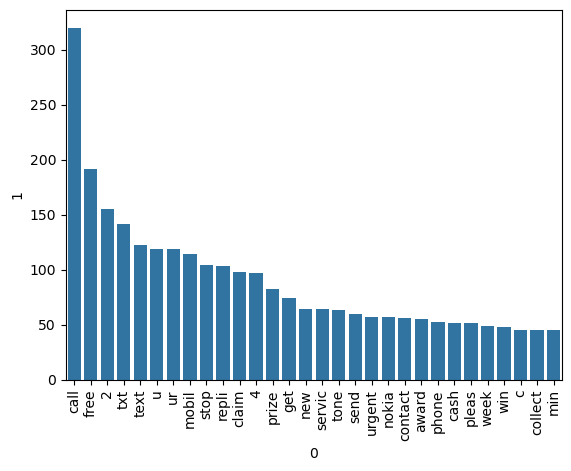

In [65]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35404

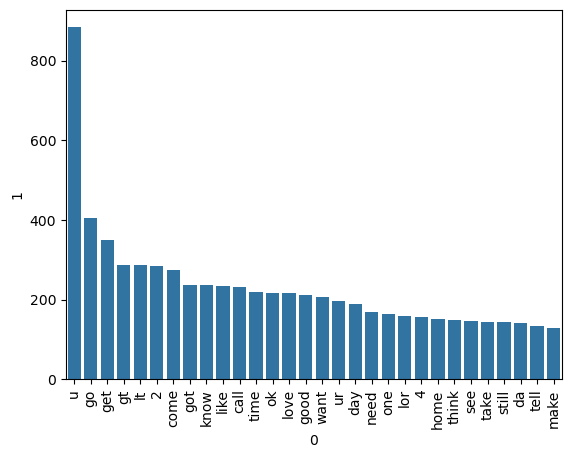

In [68]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentence                                   transformed_text  
0         24             2  go jurong point crazi avail bugi n great world...  
1          8             2                              ok lar joke wif u oni  
2         37             2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13             1                u dun say earli hor u c alreadi say  
4         15             1               nah think goe usf live around though

## 4. Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
##from sklearn.preprocessing import MinMaxScaler
##scale = MinMaxScaler()
##X = scale.fit_transform(x)

In [76]:
x.shape

(5169, 3000)

In [77]:
y = df['target'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [82]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [84]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [85]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## tfidf => mnb

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50 ,random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [88]:
clfs = {
    'SVC' : svc ,
    'KN' : knc ,
    'nB' : mnb ,
    'DT' : dtc ,
    'LR' : lrc ,
    'RF' : rfc , 
    'AdaBoost' : abc ,
    'BgC' : bc ,
    'ETC' : etc ,
    'GBDT' : gbdt ,
    'xgb' : xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For' ,name)
    print('Accuracy' ,current_accuracy)
    print('precision' ,current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
precision 1.0
For nB
Accuracy 0.9709864603481625
precision 1.0
For DT
Accuracy 0.9303675048355899
precision 0.83
For LR
Accuracy 0.9555125725338491
precision 0.96
For RF
Accuracy 0.9738878143133463
precision 0.9826086956521739
For AdaBoost
Accuracy 0.9216634429400387
precision 0.8202247191011236
For BgC
Accuracy 0.9584139264990329
precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
precision 0.9745762711864406
For GBDT
Accuracy 0.9506769825918762
precision 0.9306930693069307
For xgb
Accuracy 0.965183752417795
precision 0.9396551724137931


In [92]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)


In [93]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2         nB  0.970986   1.000000
5         RF  0.973888   0.982609
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
4         LR  0.955513   0.960000
10       xgb  0.965184   0.939655
9       GBDT  0.950677   0.930693
7        BgC  0.958414   0.868217
3         DT  0.930368   0.830000
6   AdaBoost  0.921663   0.820225

In [94]:
performance_df1 = pd.melt(performance_df , id_vars = 'Algorithm')

In [95]:
performance_df1

Algorithm   variable     value
0         KN   Accuracy  0.905222
1         nB   Accuracy  0.970986
2         RF   Accuracy  0.973888
3        SVC   Accuracy  0.975822
4        ETC   Accuracy  0.974855
5         LR   Accuracy  0.955513
6        xgb   Accuracy  0.965184
7       GBDT   Accuracy  0.950677
8        BgC   Accuracy  0.958414
9         DT   Accuracy  0.930368
10  AdaBoost   Accuracy  0.921663
11        KN  Precision  1.000000
12        nB  Precision  1.000000
13        RF  Precision  0.982609
14       SVC  Precision  0.974790
15       ETC  Precision  0.974576
16        LR  Precision  0.960000
17       xgb  Precision  0.939655
18      GBDT  Precision  0.930693
19       BgC  Precision  0.868217
20        DT  Precision  0.830000
21  AdaBoost  Precision  0.820225

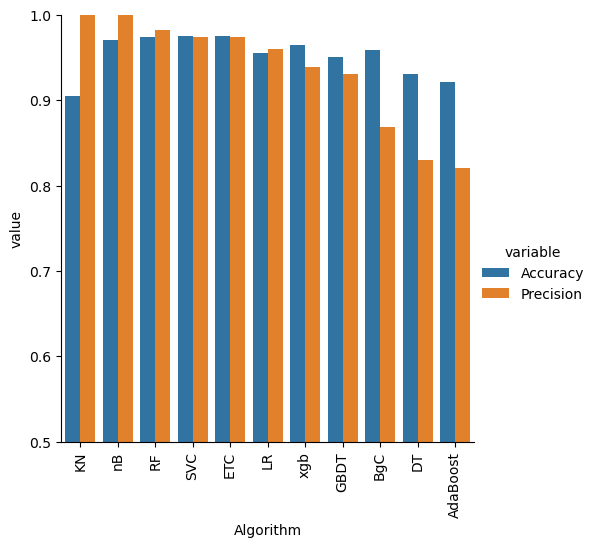

In [96]:
sns.catplot(x = 'Algorithm' , y='value',
                hue = 'variable' , data=performance_df1 ,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
## model improve
# 1. change the max_features parameter of TfIdf

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [100]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [103]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         KN  0.905222   1.000000            0.905222             1.000000   
1         nB  0.970986   1.000000            0.970986             1.000000   
2         RF  0.973888   0.982609            0.973888             0.982609   
3        SVC  0.975822   0.974790            0.975822             0.974790   
4        ETC  0.974855   0.974576            0.974855             0.974576   
5         LR  0.955513   0.960000            0.955513             0.960000   
6        xgb  0.965184   0.939655            0.965184             0.939655   
7       GBDT  0.950677   0.930693            0.950677             0.930693   
8        BgC  0.958414   0.868217            0.958414             0.868217   
9         DT  0.930368   0.830000            0.930368             0.830000   
10  AdaBoost  0.921663   0.820225            0.921663             0.820225   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.905222             1.000000            0.905222   
1             0.970986             1.000000            0.970986   
2             0.973888             0.982609            0.973888   
3             0.975822             0.974790            0.975822   
4             0.974855             0.974576            0.974855   
5             0.955513             0.960000            0.955513   
6             0.965184             0.939655            0.965184   
7             0.950677             0.930693            0.950677   
8             0.958414             0.868217            0.958414   
9             0.930368             0.830000            0.930368   
10            0.921663             0.820225            0.921663   

    Precision_num_chars  
0              1.000000  
1              1.000000  
2              0.982609  
3              0.974790  
4              0.974576  
5              0.960000  
6              0.939655  
7              0.930693  
8              0.868217  
9              0.830000  
10             0.820225

In [104]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [106]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [107]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [108]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [112]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))